# **Projeto Aprendizagem de Máquina** 






Descrição detalhada da divisão do projeto: 

- Etapas:
 - Carregar o dataset e importar as bibliotecas
 - Pequena Análise Exploratória
 - Seleção de Parâmetros / GridSearch 
 - Aplicação dos algoritmos
    - kNN
    - SVM
    - Naive-Bayes
    - Árvore de Decisão
    - MLP
  - Comparação de Matriz de Confusão e Relatório de Métricas


# 1 - Leitura dos Dados

**Importando as bibliotecas básicas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://www.openml.org/data/get_csv/584085/BNG_autos_5000_1.arff')

In [4]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,94.235189,volkswagen,diesel,turbo,four,hatchback,fwd,front,96.575655,173.369361,...,2bbl,3.122279,3.295534,9.219909,57.578864,5988.161816,31.814042,34.505390,8605.484961,2
1,106.648646,volvo,diesel,turbo,four,sedan,rwd,front,109.846269,196.214268,...,mfi,3.293933,3.392775,8.637036,113.705719,4490.621234,25.817650,35.053335,26633.568618,-1
2,118.472162,nissan,gas,std,four,wagon,fwd,front,95.024314,165.909864,...,mpfi,3.051725,3.248152,9.000000,117.757103,4799.168653,22.783708,27.760480,5900.715970,0
3,62.717600,porsche,gas,std,two,hatchback,rwd,front,100.174878,182.499698,...,1bbl,3.238181,3.241202,9.278929,85.762326,5086.244824,14.949801,24.464281,8641.179741,1
4,105.808352,honda,gas,std,four,sedan,fwd,front,96.792849,172.594242,...,2bbl,3.296874,3.506498,7.068202,73.158430,4417.985102,20.781260,19.686021,9831.490432,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   normalized-losses  1000000 non-null  float64
 1   make               1000000 non-null  object 
 2   fuel-type          1000000 non-null  object 
 3   aspiration         1000000 non-null  object 
 4   num-of-doors       1000000 non-null  object 
 5   body-style         1000000 non-null  object 
 6   drive-wheels       1000000 non-null  object 
 7   engine-location    1000000 non-null  object 
 8   wheel-base         1000000 non-null  float64
 9   length             1000000 non-null  float64
 10  width              1000000 non-null  float64
 11  height             1000000 non-null  float64
 12  curb-weight        1000000 non-null  float64
 13  engine-type        1000000 non-null  object 
 14  num-of-cylinders   1000000 non-null  object 
 15  engine-size        1000000 non-nu

In [6]:
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,113.510711,98.854919,175.094839,65.943307,53.776607,2560.843432,123.880027,3.326901,3.244812,9.983965,104.269063,5131.603023,24.451775,29.973515,13593.755393,0.821153
std,35.106574,5.990935,11.927550,2.121701,2.447637,504.357478,39.695208,0.266986,0.322483,3.845532,38.666009,547.573360,6.315004,6.416974,7970.598703,1.264560
min,37.625922,83.295423,134.019251,60.270307,46.979469,1512.825242,9.891578,2.558468,1.713911,-11.806341,38.144847,3406.968387,10.511926,11.470231,-11740.505210,-3.000000
25%,87.415814,95.016712,168.147694,64.366474,52.045923,2195.725215,98.587671,3.124133,3.115118,8.507955,75.024920,4793.758844,19.458207,25.363765,8046.079569,0.000000
50%,101.422245,97.061769,173.808763,65.624562,53.901260,2448.739895,112.789370,3.327894,3.278506,9.000000,95.446948,5092.150170,23.975710,29.876137,10823.699995,1.000000
75%,137.589230,101.587399,182.658106,66.871121,55.374157,2884.920428,134.757312,3.547367,3.416920,9.350466,118.154583,5486.313227,28.069830,33.407297,15824.226678,2.000000
max,273.722584,127.194382,215.994000,75.596629,62.500610,4716.212861,381.012483,4.072103,4.458423,42.161764,303.922617,6931.555398,54.824617,61.696829,63918.819174,3.000000


In [7]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,88888,865828,742443,522406,419455,471264,919619,462284,507365,361956


In [8]:
# list the data types for each column
print(df.dtypes)

normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
symboling              int64
dtype: object


In [9]:
df.isnull().sum()

normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
dtype: int64

In [10]:
# Convertendo variável 'symboling' para formato categórico

df['symboling'] = df['symboling'].astype('category')
# df.drop(labels=['symboling'],axis=1,inplace=True)

In [11]:
# sns.countplot(x='symboling',data=df)

In [12]:
len(df.duplicated() == False)

1000000

In [13]:
df.drop(df.loc[df['price'] <= 0].index, inplace=True)

In [14]:
df.drop(df.loc[df['compression-ratio'] <= 0].index, inplace=True)

In [15]:
df.select_dtypes(include='float').columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [16]:
df.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

### Removendo *Outliers* via Método de Tukey

<AxesSubplot:xlabel='price'>

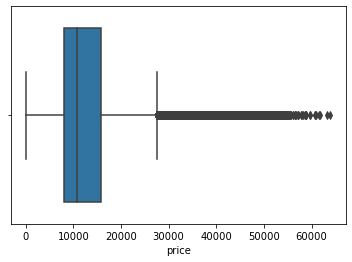

In [17]:
# quartis de preço (imteressante pra remover outliers)
sns.boxplot(df['price'])

In [18]:
# MAD calculado de forma manual
mad = abs(df['price'] - df['price'].median()).median()*(1/0.6745)

In [19]:
# Cálculo dos intervalos e valor do IQR

q1 = df['price'].quantile(q=0.25)
q3 = df['price'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

7778.0595925


In [20]:
# Salvando valores sem outliers em novo dataset

df = df[(df['price'] > (q1-1.5*iqr)) & (df['price'] < (q3+1.5*iqr))]
len(df)

909521

<AxesSubplot:xlabel='price'>

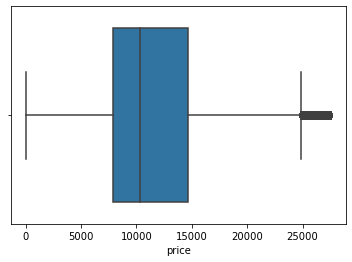

In [21]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

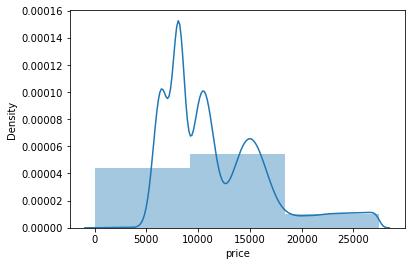

In [22]:
sns.distplot(a=df['price'],bins=3)

In [23]:
df['price'].count()

909521

In [26]:
df[df['price'] < 5000].count()

normalized-losses    3560
make                 3560
fuel-type            3560
aspiration           3560
num-of-doors         3560
body-style           3560
drive-wheels         3560
engine-location      3560
wheel-base           3560
length               3560
width                3560
height               3560
curb-weight          3560
engine-type          3560
num-of-cylinders     3560
engine-size          3560
fuel-system          3560
bore                 3560
stroke               3560
compression-ratio    3560
horsepower           3560
peak-rpm             3560
city-mpg             3560
highway-mpg          3560
price                3560
symboling            3560
dtype: int64

In [27]:
# Discretizando coluna de preços para o chi-quadrado
df['price_cat'] = pd.cut(df['price'],[0,10000,20000,30000])

In [28]:
df.select_dtypes(include='category').columns

Index(['symboling', 'price_cat'], dtype='object')

In [29]:
# Convertendo 'object' para correspondente numérico

In [30]:
# Lista com informações das colunas convertidas chave-valor
lista_de_dicts = []

for col in df.select_dtypes(include=['object','category']).columns:
  makers = dict(enumerate(df[col].unique()))
  lista_de_dicts.append({col:makers})
  df[col] = df[col].apply(lambda make: [k for k, v in makers.items() if v == make][0])
  df[col] = df[col].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909521 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   normalized-losses  909521 non-null  float64 
 1   make               909521 non-null  category
 2   fuel-type          909521 non-null  category
 3   aspiration         909521 non-null  category
 4   num-of-doors       909521 non-null  category
 5   body-style         909521 non-null  category
 6   drive-wheels       909521 non-null  category
 7   engine-location    909521 non-null  category
 8   wheel-base         909521 non-null  float64 
 9   length             909521 non-null  float64 
 10  width              909521 non-null  float64 
 11  height             909521 non-null  float64 
 12  curb-weight        909521 non-null  float64 
 13  engine-type        909521 non-null  category
 14  num-of-cylinders   909521 non-null  category
 15  engine-size        909521 non-null

In [33]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,price_cat
0,94.235189,0,0,0,0,0,0,0,96.575655,173.369361,...,3.122279,3.295534,9.219909,57.578864,5988.161816,31.814042,34.505390,8605.484961,0,0
1,106.648646,1,0,0,0,1,1,0,109.846269,196.214268,...,3.293933,3.392775,8.637036,113.705719,4490.621234,25.817650,35.053335,26633.568618,1,1
2,118.472162,2,1,1,0,2,0,0,95.024314,165.909864,...,3.051725,3.248152,9.000000,117.757103,4799.168653,22.783708,27.760480,5900.715970,2,0
3,62.717600,3,1,1,1,0,1,0,100.174878,182.499698,...,3.238181,3.241202,9.278929,85.762326,5086.244824,14.949801,24.464281,8641.179741,3,0
4,105.808352,4,1,1,0,1,0,0,96.792849,172.594242,...,3.296874,3.506498,7.068202,73.158430,4417.985102,20.781260,19.686021,9831.490432,2,0


<AxesSubplot:>

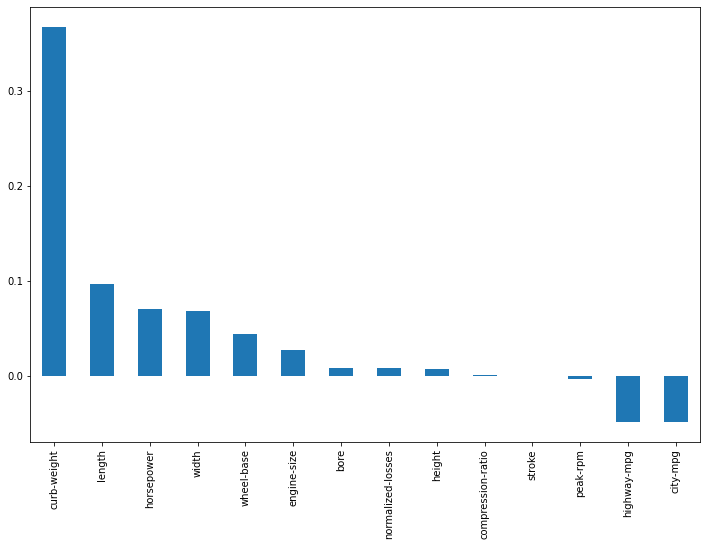

In [34]:
# Correlação das variáveis numéricas com o preço

plt.figure(figsize=(12,8))
# sns.heatmap(df['price'].corr(),annot=True,cmap='RdBu')
df.corr()['price'][:-1].sort_values(ascending=False).plot(kind='bar')

# **2 - Seleção de parametros** 

## **Seleção de atributos mais relevantes por meio de Qui-Quadrado**

In [37]:
# Importar metrica
from sklearn.feature_selection import chi2

In [38]:
df.select_dtypes(include='category').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'symboling', 'price_cat'],
      dtype='object')

In [39]:
# Split dataset
A = df[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system','symboling']]
b = df['price_cat']

In [40]:
# Calculando Chi-Squared
chi_scores = chi2(A,b)

In [41]:
# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=A.columns)
pvalues = pd.Series(chi_scores[1], index=A.columns)

list_gl = []
for col in A.columns:
  list_gl.append((A[col].nunique() - 1)*(b.nunique() - 1))

gl = pd.Series(np.array(list_gl), index=A.columns)

In [42]:
# Results
chi = pd.DataFrame({'Chi2':scores, 'p-Value':pvalues, 'D. Freedom':gl})
chi

,Chi2,p-Value,D. Freedom
make,1255.496126,2.357655e-273,42
fuel-type,2.771895,2.500867e-01,2
aspiration,51.817975,5.595897e-12,2
num-of-doors,260.918189,2.199557e-57,2
body-style,609.722907,3.984309e-133,8
drive-wheels,2717.355345,0.000000e+00,4
engine-location,478.337575,1.349943e-104,2
engine-type,2683.058657,0.000000e+00,12
num-of-cylinders,1866.326961,0.000000e+00,12
fuel-system,73.875714,9.080139e-17,14


In [43]:
chi.sort_values(by = ['Chi2'], ascending=False)

,Chi2,p-Value,D. Freedom
symboling,4713.239025,0.000000e+00,12
drive-wheels,2717.355345,0.000000e+00,4
engine-type,2683.058657,0.000000e+00,12
num-of-cylinders,1866.326961,0.000000e+00,12
make,1255.496126,2.357655e-273,42
body-style,609.722907,3.984309e-133,8
engine-location,478.337575,1.349943e-104,2
num-of-doors,260.918189,2.199557e-57,2
fuel-system,73.875714,9.080139e-17,14
aspiration,51.817975,5.595897e-12,2


### Selecionando as variáveis mais signitificativas em decorrência dos testes de correlação e dependência

In [219]:
new_df = df[['make', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system','price','price_cat','symboling']]
       # 'curb-weight'

### Proporção dos dados

In [220]:
round(new_df[new_df['price_cat']==0].shape[0]/new_df['price_cat'].shape[0], 2)*100

46.0

In [221]:
round(new_df[new_df['price_cat']==1].shape[0]/new_df['price_cat'].shape[0], 2)*100

8.0

In [222]:
round(new_df[new_df['price_cat']==2].shape[0]/new_df['price_cat'].shape[0], 2)*100

46.0

In [268]:
#selecionando 3000 amostras do dataset original
data0 = new_df[new_df['price_cat']==0].sample(4600)
data1 = new_df[new_df['price_cat']==1].sample(800)
data2 = new_df[new_df['price_cat']==2].sample(4600)

data = pd.concat([data0, data1, data2], ignore_index=True)

In [269]:
data['price_cat'].value_counts().sort_values() 

1     800
0    4600
2    4600
Name: price_cat, dtype: int64

# **Treinamento da Máquina**

In [270]:
# Bibliotecas dos Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Pré-processamento
from sklearn.preprocessing import label_binarize

#Funções de Validação
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, plot_roc_curve, roc_auc_score, plot_confusion_matrix, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

#plotar graficos ROCAUC
from yellowbrick.classifier import ROCAUC

## **Stratified k-Fold Cross Validation**

In [271]:
#One hot encoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [272]:
# divisão dos datasets

X = data.drop(['price', 'price_cat'], axis=1)
y = data['price_cat']

In [273]:
# one-hot encode input variables
ohe = OneHotEncoder(sparse=False)
X = pd.DataFrame(ohe.fit_transform(X))
lenc = LabelEncoder()
y = pd.DataFrame(lenc.fit_transform(y))

In [274]:
X.shape

(10000, 65)

In [275]:
y.shape

(10000, 1)

In [276]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
9995,2
9996,2
9997,2
9998,2


In [277]:
X

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [278]:
# função pra treinar os algoritmos
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

In [279]:
# função do GridSearch

def grids(grid_params, clf, X_train, y_train):
  grid = GridSearchCV(estimator = clf, param_grid=grid_params, scoring='accuracy')
  grid.fit(X_train, y_train)
  
  return grid.best_params_

In [280]:
# função para recolher os resultados do modelo

def major_results(model, X_train, y_train, X_test, y_test, option, **kwargs):

  # lista para armazenar os dados
  accuracies = []
  f1_scores = []
  auc_list = []
  conf_mat = []

  #dicionário com todas listas
  partial_results = {
      'accuracy': accuracies,
      'f1': f1_scores,
      'auc_list': auc_list,
      'cm': conf_mat
  }

  if option == 1:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_auc = model.predict_proba(X_test)


  #medindo e armazenando acurácia, f1-score e auc-score no dicionário
  accuracy = model.score(X_test, y_test)
  f1 = f1_score(y_test, y_pred, average='macro')
  AUC = roc_auc_score(y_test, y_pred_auc, average='macro', multi_class='ovr')
  conf_mat = confusion_matrix(y_test, y_pred)

  partial_results['accuracy'].append(accuracy)
  partial_results['f1'].append(f1)
  partial_results['auc_list'].append(AUC)
  partial_results['cm'].append(conf_mat)

  return partial_results


In [281]:
# parâmetros knn
knn_params = {
    'n_neighbors' : range(1,41,2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidian','manhattan','chebyshev']
}

# parâmetros mlp
mlp_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "max_iter" : [10,20],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}
# parâmetros dt
dt_params = { 
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 10)} 

#parâmetros SVM 
svm_params = {'C': [0.1, 1, 10],
              'degree': [3],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

#parametros GNB
gnb_params = {
    'var_smoothing': np.logspace(0,-9, num=100)    
}
#parametros BNB
bnb_params = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}

In [282]:
def plot_ROC_curve(model, X_train, y_train, X_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: '0', 
                                        1: '1', 
                                        2: '2'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

In [283]:
# função de avaliação dos modelos
def evaluate_model_with_skfold(skf):

  # Listas com os resultados
  knn_r, mlp_r, dt_r, svm_r, gnb_r, bnb_r, accuracies, f1_s, auc_s, result_matrix = [],[],[],[],[],[],[],[],[],[] 

  #dicionário com todas listas
  general_results = {
    'knn': knn_r,
    'mlp': mlp_r,
    'dt': dt_r,
    'svm': svm_r,
    'gnb': gnb_r,
    'bnb': bnb_r 
  }

  knn_mx, mlp_mx, dt_mx, svm_mx, gnb_mx, bnb_mx = 0, 0, 0, 0, 0, 0
  print('Aguarde, treinando os modelos ', end='')
  print('\n')
  i = 1
  for train, test in skf.split(X, y):
    X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]

    print(f'{i}º Fold', end=': ')
    #for the kNN
    dict_knn = grids(knn_params, KNeighborsClassifier(),X_train, y_train)
    knn = KNeighborsClassifier(n_neighbors=dict_knn['n_neighbors'], weights=dict_knn['weights'], 
                                metric = dict_knn['metric'])    
    # retorna um dicionário com as métricas computadas
    result = major_results(knn, X_train, y_train, X_test, y_test, option = 1)
    # adiciona o dicionário de métricas na 
    knn_r.append(result)
    
    if np.array(result['auc_list']).max() >= knn_mx:
        knn_mx = np.array(result['auc_list']).max()
        knn_to_be_ploted = knn
    
    print('kNN', end = ' - ')

    #for the MLP

    dict_mlp = grids(mlp_params, MLPClassifier(),X_train, y_train)
    mlpc = MLPClassifier(alpha=dict_mlp['alpha'], hidden_layer_sizes=dict_mlp['hidden_layer_sizes'],
                         max_iter=dict_mlp['max_iter'], solver=dict_mlp['solver'], activation=dict_mlp['activation'])
    result = major_results(mlpc, X_train, y_train, X_test, y_test, option = 1)
    mlp_r.append(result)

    if np.array(result['auc_list']).max() >= mlp_mx:
        mlp_mx = np.array(result['auc_list']).max()
        mlp_to_be_ploted = mlpc
    
    print('MLP', end = ' - ')
     
    #for the DT
    
    dict_dt = grids(dt_params, DecisionTreeClassifier(), X_train, y_train)
    dtc = DecisionTreeClassifier(criterion=dict_dt['criterion'], max_depth=dict_dt['max_depth'])
    result = major_results(dtc, X_train, y_train, X_test, y_test, option = 1)
    dt_r.append(result)
    
    if np.array(result['auc_list']).max() >= dt_mx:
        dt_mx = np.array(result['auc_list']).max()
        dt_to_be_ploted = dtc
    
    print('DT', end = ' - ')
    
    #for the SVM
    
    dict_svm = grids(svm_params, SVC(), X_train, y_train)
    svm = SVC(C=dict_svm['C'], gamma=dict_svm['gamma'], kernel=dict_svm['kernel'], degree=dict_svm['degree'], probability=True)
    result = major_results(svm, X_train, y_train, X_test, y_test, option = 1)
    svm_r.append(result)
    
    if np.array(result['auc_list']).max() >= svm_mx:
        svm_mx = np.array(result['auc_list']).max()
        svm_to_be_ploted = svm
    
    print('SVM', end = ' - ')
    
    #for the GNB
    
    dict_gnb = grids(gnb_params, GaussianNB(), X_train, y_train)
    gnb = GaussianNB(var_smoothing=dict_gnb['var_smoothing'])
    result = major_results(gnb, X_train, y_train, X_test, y_test, option = 1)
    gnb_r.append(result)
    
    if np.array(result['auc_list']).max() >= svm_mx:
        gnb_mx = np.array(result['auc_list']).max()
        gnb_to_be_ploted = gnb
    print('GNB', end = ' - ')
    
    #for the BNB
    
    dict_bnb = grids(bnb_params, BernoulliNB(), X_train, y_train)
    bnb = BernoulliNB(alpha=dict_bnb['alpha'])
    result = major_results(bnb, X_train, y_train, X_test, y_test, option = 1)
    bnb_r.append(result)
    
    if np.array(result['auc_list']).max() >= svm_mx:
        bnb_mx = np.array(result['auc_list']).max()
        bnb_to_be_ploted = bnb
    
    print('BNB', end = ' ')
    print('\n')
    i = i+1
  
  knn_r.append(knn_to_be_ploted)
  mlp_r.append(mlp_to_be_ploted)
  dt_r.append(dt_to_be_ploted)
  svm_r.append(svm_to_be_ploted)
  gnb_r.append(gnb_to_be_ploted)
  bnb_r.append(bnb_to_be_ploted)

  general_results['knn'] = knn_r
  general_results['mlp'] = mlp_r
  general_results['dt'] = dt_r
  general_results['svm'] = svm_r
  general_results['gnb'] = gnb_r
  general_results['bnb'] = bnb_r

  print('\n')
  for k, v in general_results.items():
    for item in v[:-2]:
      accuracies.append(item['accuracy'])
      f1_s.append(item['f1'])
      auc_s.append(item['auc_list'])
      result_matrix.append(np.array(item['cm']))


    print(f'Model: {k}\n')
    print("Acurácia média (desvio): %.6f +- (%.6f)" %(np.array(accuracies).mean(), np.array(accuracies).std()))
    print("F1-score média (desvio): %.6f +- (%.6f)" %(np.array(f1_s).mean(), np.array(f1_s).std()))
    print("AUC média (desvio): %.6f +- (%.6f)\n" %(np.array(auc_s).mean(), np.array(auc_s).std()))
    print(f"Matriz de Confusão:  \n{sum(result_matrix)*0.1}\n")
    print('\n')
    print('A curva ROC com do modelo de maior AUC é: \n')

    plot_ROC_curve(v[-1], X_train, y_train, X_test, y_test)

    accuracies, f1_s, auc_s, result_matrix = [], [], [], []


Aguarde, treinando os modelos 

1º Fold: kNN - MLP - DT - SVM - GNB - BNB 

2º Fold: kNN - MLP - DT - SVM - GNB - BNB 

3º Fold: kNN - MLP - DT - SVM - GNB - BNB 

4º Fold: kNN - MLP - DT - SVM - GNB - BNB 

5º Fold: kNN - MLP - DT - SVM - GNB - BNB 

6º Fold: kNN - MLP - DT - SVM - GNB - BNB 

7º Fold: kNN - MLP - DT - SVM - GNB - BNB 

8º Fold: kNN - MLP - DT - SVM - GNB - BNB 

9º Fold: kNN - MLP - DT - SVM - GNB - BNB 

10º Fold: kNN - MLP - DT - SVM - GNB - BNB 



Model: knn

Acurácia média (desvio): 0.523222 +- (0.018984)
F1-score média (desvio): 0.364001 +- (0.013300)
AUC média (desvio): 0.557319 +- (0.019584)

Matriz de Confusão:  
[[[2.488e+02 3.000e-01 1.649e+02]
  [3.710e+01 1.000e-01 3.480e+01]
  [1.916e+02 4.000e-01 2.220e+02]]]



A curva ROC com do modelo de maior AUC é: 



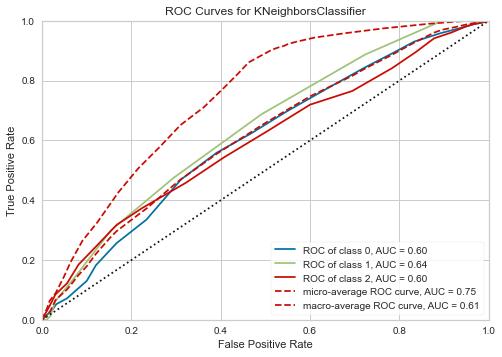

Model: mlp

Acurácia média (desvio): 0.545222 +- (0.017491)
F1-score média (desvio): 0.378067 +- (0.011773)
AUC média (desvio): 0.584902 +- (0.020594)

Matriz de Confusão:  
[[[245.2   0.  168.8]
  [ 33.9   0.   38.1]
  [168.5   0.  245.5]]]



A curva ROC com do modelo de maior AUC é: 



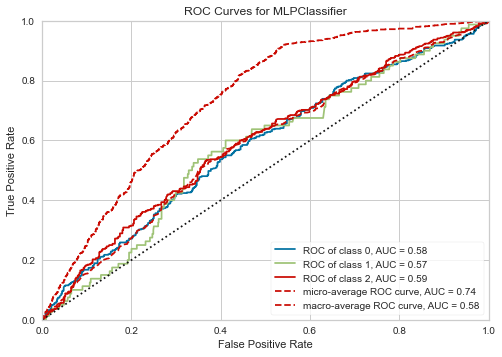

Model: dt

Acurácia média (desvio): 0.546556 +- (0.015356)
F1-score média (desvio): 0.377324 +- (0.010765)
AUC média (desvio): 0.596023 +- (0.017224)

Matriz de Confusão:  
[[[2.758e+02 1.000e-01 1.381e+02]
  [3.620e+01 0.000e+00 3.580e+01]
  [1.979e+02 0.000e+00 2.161e+02]]]



A curva ROC com do modelo de maior AUC é: 



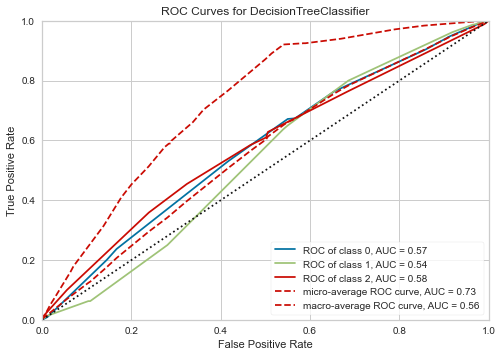

Model: svm

Acurácia média (desvio): 0.547333 +- (0.017707)
F1-score média (desvio): 0.379664 +- (0.012168)
AUC média (desvio): 0.573517 +- (0.013553)

Matriz de Confusão:  
[[[250.1   0.  163.9]
  [ 32.2   0.   39.8]
  [171.5   0.  242.5]]]



A curva ROC com do modelo de maior AUC é: 



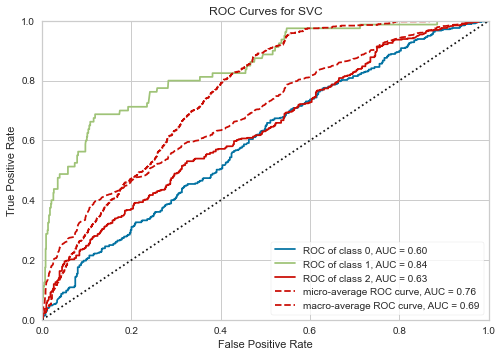

Model: gnb

Acurácia média (desvio): 0.540444 +- (0.017308)
F1-score média (desvio): 0.371531 +- (0.011942)
AUC média (desvio): 0.590942 +- (0.016002)

Matriz de Confusão:  
[[[292.4   0.  121.6]
  [ 41.6   0.   30.4]
  [220.    0.  194. ]]]



A curva ROC com do modelo de maior AUC é: 



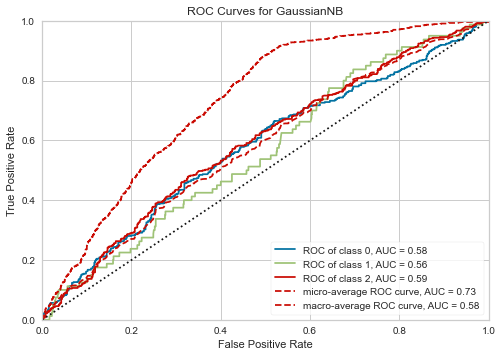

Model: bnb

Acurácia média (desvio): 0.540333 +- (0.013250)
F1-score média (desvio): 0.375095 +- (0.009091)
AUC média (desvio): 0.588232 +- (0.015185)

Matriz de Confusão:  
[[[250.9   0.  163.1]
  [ 33.6   0.   38.4]
  [178.6   0.  235.4]]]



A curva ROC com do modelo de maior AUC é: 



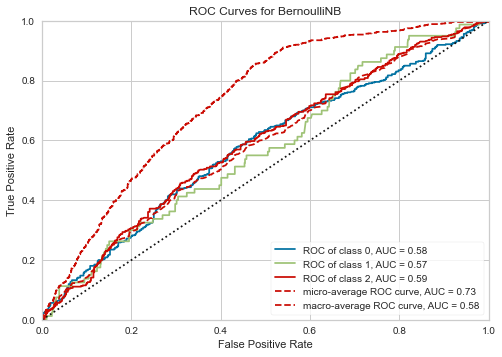

Wall time: 2h 28min 8s


In [284]:
%%time 

evaluate_model_with_skfold(skf)